# Project 3 Example (This example would earn an A+)

### Scientific Question: How structurally similar are compounds known to inhibit Phosphatidylinositol 4,5-bisphosphate 3-kinase (PI3K) in humans? [2 points for specific, measurable, and clear scientific question]

  Phosphatidylinositol 4,5-bisphosphate is responsible for converting phosphatidylinositol (PtdIns), phosphatidylinositol 4-phosphate (PtdIns4P), and phosphatidylinositol 4,5-bisphosphate (PtdIns(4,5)P2) into phosphatidylinositol 3,4,5-trisphosphate (PIP3) through a typical kinase phosphorylation mechanism. Mutations in PIK3CA are linked to cancer (Martini et al., 2014). 
  
  There are multiple drug discovery companies that have studied PI3K and found inhibitors of this protein. These include Exelexis, Genentech, Astellas, Zentaris, and more. The structures of these small molecule inhibitors could be obtained from the Binding DB (http://www.bindingdb.org/bind/index.jsp). As stated on this databases website:
  
  "BindingDB is a public, web-accessible database of measured binding affinities, focusing chiefly on the interactions of protein considered to be drug-targets with small, drug-like molecules. As of February 7, 2021, BindingDB contains 41,328 Entries, each with a DOI, containing 2,114,159 binding data for 8,202 protein targets and 928,022 small molecules."
  
  [ 3 points for background on the protein of interest, background on the inhibitors, and description of the database used for this project]

### Scientific Hypothesis: If the PI3K inhibitor compounds from publically available databases are extremely chemically diverse then there will not be one cluster of compounds that is more potent than the others.  [ 2 points for specific, measurable, and clear scientific hypothesis]

There are over 8300 small-molecule inhibitors identified from the BindingDB website against PI3K. A select few of these compounds were saved to an SDF file that was then read in here for a Fingerprint analysis. The compounds were then clustered based on structural similarity, and the cluster centroids were ploted in a heatplot to show how different the compounds were from one another. Finally, the average potency of the clusters was compared on a histogram and p-values were calculated to demonstrate that no one cluster was any more potent than the others. 

To answer this scientific question and test my hypothesis, I first had to find a FASTA file that contained the sequence for PI3K. To find this file, I chose to search for PI3K on the protein databank (https://www.rcsb.org/structure/6GVF). I also had to sign up for the BindingDB website. Once I did these two things, at the BindingDB, under SPECIAL TOOLS, I selected "Find Compounds for my Targets." On that page I pasted in the FASTA file that I found from the PDB and searched. On the BindingDB search page, I clicked "Add all pages" and then "Make Dataset." I then downloaded a 2D SDF file and that is the data I imported here. 

[3 points for description of what analyses were done and how the data was downloaded for the project]

### Part 1: Load the Packages

Packages loaded include the following (For the full 5 points here I would have to correctly define these, but I will not do that here as these definitions are up to you!):

- Pandas: 

- Numpy:

- SciPy:

- pubchempy:

- rdkit:

- matplotlib:

- IPython.display: 

- os: 

- itertools: 

In [7]:
# Correctly import all the packages needed (3 points)
import pandas as pd
import numpy as np
import scipy as scip
import os
import pubchempy as pcp
from IPython.display import Image
from rdkit import Chem
from rdkit import DataStructs
import itertools
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import rdMolAlign
from rdkit.Chem.rdMolAlign import AlignMol
from rdkit.Chem import rdmolfiles
from rdkit.Chem.rdmolfiles import ForwardSDMolSupplier

### Part 2: Load in the data and perform Bioinformatics Analyses (RDKit Fingerprint & Similarity Analyses)

[Description is given of the type of data loaded in and the Bioinformatics analysis being performed - 2 points] 
SDF file is a structure data file that contains information about how atoms are arranged in space relative to one another, by giving coordinates for each atom in x, y and z direction. Molecular fingerprints are 2D descriptors of a 3D chemical structure, and the connectivity between atoms. Molecular fingerprints can be compared by the sequence of atoms in the 2D string.

In the code below, we read in molecules from an SDF file, and then turn these 3D molecules into molecular fingerprints. Use itertools to iterate through all of the molecular pairs to calculate the Fingerprint similarities between each molecule to store in the matrix fps_sim_matrix. 

In [9]:
# read in molecular data from the sdf that was saved from the BindingDB website
m = Chem.SDMolSupplier('ForFEP_SMILES.sdf')

# Save the molecules as fingerprints and save to the variable fps.
fps = [Chem.RDKFingerprint(x) for x in m]

# Check the data store in fps by uncommenting the line below
print(fps)

# Create an empy matrix the right size for us to populate
fps_sim_matrix = np.empty(shape=(18,18))

# Run a for-loop over each pair of compounds in fps to compute their chemical similarities
for i, j in itertools.product(range(18), range(18)):
    
    # To check that the for loop is correctly iterating over each of the compounds uncomment the line below
    print(DataStructs.FingerprintSimilarity(fps[i],fps[j]))
    fps_sim_matrix[i,j] = DataStructs.FingerprintSimilarity(fps[i],fps[j])

# To check that the for loop correctly created a matrix of similarity score print the matrix by uncommenting the line below
print(fps_sim_matrix)

#[Code works correctly is 5 points, Code is commented well and succint is 5 points]

[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7f300>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7f3f0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7f940>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7fd00>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7f8a0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x105b7fad0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b58f1c0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b58fcb0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b54e5d0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b58f2b0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11abfec10>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b58f5d0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b58f850>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x11b

### Part 3: Create a heatmap showing the Fingerprint similarity scores between all compounds in the set.

[Description of data analysis method described clearly - 3 points] Here we are using matplotlib to create a plot that will be printed out below. The x and y axes will be labeled based on the values in the list "cpds". The color bar is added, X and y axis ticks are added, and the plot is saved and displayed. Heatmaps are a data visualization technique for viewing the magnitude of phenomenon as a color out of a gradient of colors. Heatmaps are 2D graphs and can often be used to show the relative amount of a substance, or in this case, the similarity scores between all data points compared. This sort of plot could be used to compare the alignment scores between a set of sequences, and here it is used to compare the similarity scores between all compounds in a set. 

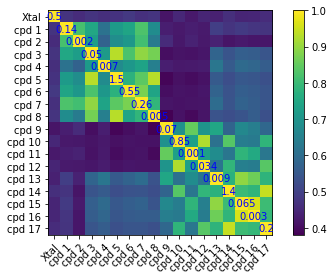

In [16]:
# Set a figure and ax varialbe equal to plt.subplots()
fig, ax = plt.subplots()

# Assign names to each of the compounds in the matrix
cpds = ['Xtal', 'cpd 1', 'cpd 2', 'cpd 3', 'cpd 4', 'cpd 5', 'cpd 6', 'cpd 7', 'cpd 8', 'cpd 9', 'cpd 10', 'cpd 11', 'cpd 12', 'cpd 13', 'cpd 14', 'cpd 15', 'cpd 16', 'cpd 17']

# The potencies were found from the Binding DB, and manually saved here to a list of floats. These potencies are in uM.

potency = np.array([[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.065, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

# Add the potency labels to the diagonal cells
im = ax.imshow(potency)

# Instruct the heat map to show the axes
im = ax.imshow(fps_sim_matrix)

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# Actually show the heatplot
plt.imshow(fps_sim_matrix)

# Set the X-axis & Y-Axis ticks
ax.set_xticks(np.arange(len(cpds)))
ax.set_yticks(np.arange(len(cpds)))

# Label the X and Y axes with specific tick labels (calling the list cpds)
ax.set_xticklabels(cpds)
ax.set_yticklabels(cpds)

# Loop over each of the axis to add the text labels
for i in range(len(cpds)):
    for j in range(len(cpds)):
        if i == j:
            text = ax.text(j, i, potency[i, j],
                       ha="center", va="center", color="b")
        else:
            continue

# Indicate how the tick labels are going to be displayed on the x-axis
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Save a PNG file with the heatmap 
plt.savefig('FEP_tanimoto_forVEGFR2Inhibitors.png')

# Show the heatmap
fig.tight_layout()
plt.show()

#[Code works - 2 points, and Code is well commented - 2 points]

### Part 4: Analysis of the results

[3 points for correctly analyzing the data] The plot above shows the similarities between all 18 compounds in the set. The Xtal ligand is the ligand that was identified from the protein data bank (PDB: 2OH4). The other 17 compounds were downloaded from the BindingDB. Compounds that are similar to one another have a higher FingerPrint Similarity score (closer to 1.0 & yellow) and those that are less similar to one another have a lower FingerPrint Similarity score (closer to 0.4 & purple). Each cell in the matrix represents a similarity score. The diagonal are all yellow because these are comparing the similarity between a compound and itself. There are two sets of compounds that are more similar to one another. Compounds 1-8 are similar, and Compounds 9-17 are similar. Yet despite this visual clustering, there are potent compounds (less than 0.01 uM) in both sets of compounds. Thus, my hypothesis was correct and there was not one cluster of compounds that was necessarily more potent than others. 